# Data Analysis over the Clusters
## Loading libraries

In [1]:
import numpy as np
import cygnus_lib as cy
import toolslib as tl
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from ast import literal_eval

## font definition
%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']

## Variables definition

In [2]:
x_resolution = y_resolution = 2048
rescale      = 512
scale        = int(x_resolution/rescale)

## Loading data

List contain:

[0 - Run number, 1 - Image Number, 2 - Tag of the cluster, 3 - Pixel X position, 4 - Pixel Y position, 5 - Light in the pixel, 6 - Pedestal in the pixel]

In [6]:
tic=time()
#------------------- Loading File ------------------------------#
directory = ("./data/")          # Directory of the output file
filename  = ("ClustersTable")    # Name of the output file
extension = (".csv")             # Extension of the output file
dataout = directory + filename + extension # Full path of the output file

dt = {'Run': np.int64, 'Image': np.int64, 'Tag': np.object, 'X': np.object, 'Y': np.object, 'Light': np.object, 'Pedestal': np.object}

df = pd.read_csv(dataout,dtype=dt)

In [7]:
df.loc[:,'X'] = df.loc[:,'X'].apply(literal_eval)
df.loc[:,'Y'] = df.loc[:,'Y'].apply(literal_eval)
df.loc[:,'Light'] = df.loc[:,'Light'].apply(literal_eval)
df.loc[:,'Pedestal'] = df.loc[:,'Pedestal'].apply(literal_eval)
toc = time()

In [8]:
print("Loading time: %.2f" % (toc-tic))

Loading time: 707.33


In [9]:
# Showing the table
df.head(n = 10)

,Run,Image,Tag,X,Y,Light,Pedestal
0,494,0,m,"[808, 808, 808, 808, 809, 809, 809, 809, 810, ...","[40, 41, 42, 43, 40, 41, 42, 43, 40, 41, 42, 4...","[103, 96, 98, 103, 97, 129, 99, 120, 100, 98, ...","[103, 102, 101, 104, 100, 115, 102, 104, 104, ..."
1,494,0,m,"[652, 652, 652, 652, 653, 653, 653, 653, 654, ...","[112, 113, 114, 115, 112, 113, 114, 115, 112, ...","[98, 102, 99, 104, 103, 102, 101, 98, 103, 99,...","[99, 102, 103, 102, 102, 102, 100, 102, 102, 1..."
2,494,0,m,"[404, 404, 404, 404, 405, 405, 405, 405, 406, ...","[160, 161, 162, 163, 160, 161, 162, 163, 160, ...","[96, 101, 102, 103, 100, 100, 100, 98, 104, 10...","[96, 102, 102, 102, 99, 103, 102, 99, 102, 103..."
3,494,0,m,"[1272, 1272, 1272, 1272, 1273, 1273, 1273, 127...","[488, 489, 490, 491, 488, 489, 490, 491, 488, ...","[103, 96, 100, 103, 100, 105, 100, 100, 103, 1...","[102, 103, 103, 103, 103, 103, 106, 102, 102, ..."
4,494,0,m,"[1208, 1208, 1208, 1208, 1209, 1209, 1209, 120...","[724, 725, 726, 727, 724, 725, 726, 727, 724, ...","[99, 108, 106, 102, 102, 106, 111, 100, 101, 1...","[102, 103, 102, 102, 104, 102, 110, 102, 102, ..."
5,494,0,m,"[1516, 1516, 1516, 1516, 1517, 1517, 1517, 151...","[780, 781, 782, 783, 780, 781, 782, 783, 780, ...","[103, 108, 116, 100, 113, 111, 111, 110, 109, ...","[102, 102, 105, 102, 109, 103, 102, 103, 104, ..."
6,494,0,m,"[1484, 1484, 1484, 1484, 1485, 1485, 1485, 148...","[856, 857, 858, 859, 856, 857, 858, 859, 856, ...","[109, 100, 103, 98, 104, 101, 101, 110, 114, 1...","[103, 104, 104, 107, 103, 103, 106, 104, 104, ..."
7,494,0,m,"[700, 700, 700, 700, 701, 701, 701, 701, 702, ...","[996, 997, 998, 999, 996, 997, 998, 999, 996, ...","[133, 106, 106, 101, 100, 120, 113, 103, 103, ...","[135, 103, 102, 102, 104, 110, 105, 102, 103, ..."
8,494,0,m,"[516, 516, 516, 516, 517, 517, 517, 517, 518, ...","[1060, 1061, 1062, 1063, 1060, 1061, 1062, 106...","[100, 103, 102, 111, 103, 98, 99, 101, 100, 11...","[105, 102, 104, 107, 103, 103, 99, 103, 102, 1..."
9,494,0,m,"[804, 804, 804, 804, 805, 805, 805, 805, 806, ...","[1240, 1241, 1242, 1243, 1240, 1241, 1242, 124...","[107, 102, 102, 104, 109, 109, 114, 107, 111, ...","[100, 105, 104, 103, 105, 107, 109, 103, 103, ..."


In [10]:
variables = df.iloc[:,0:3].copy()
variables.head(n = 5)

,Run,Image,Tag
0,494,0,m
1,494,0,m
2,494,0,m
3,494,0,m
4,494,0,m


## Declaration  of the new variables

In [11]:
sl = np.zeros(df.shape[0],dtype=float)
sb = np.zeros(df.shape[0],dtype=float)
sp = np.zeros(df.shape[0],dtype=float)
co = np.zeros(df.shape[0],dtype=float)

In [12]:
## Loop to calculate the new variables

for ind in range(0,df.shape[0]):
    sl[ind] = np.sum(df.Light[ind])
    sb[ind] = np.sum(df.Pedestal[ind])
    sp[ind] = np.size(df.X[ind])
    co[ind] = np.abs(np.corrcoef(df.X[ind],df.Y[ind])[0][1])    
    #lenY[ind]  = np.mean(np.unique(df.X[ind],return_counts=True)[1]*scale)
    #lenX[ind]  = np.mean(np.unique(df.Y[ind],return_counts=True)[1]*scale)

In [13]:
# Insertion in the table
variables.insert(3,'SumLight',sl)
variables.insert(4,'SumPedestal',sb)
variables.insert(5,'SumPixels',sp)
variables.insert(6,'PhotonPPixels',(sl-sb)/sp)
variables.insert(7,'XYCorrelation',co)
variables.insert(8,'LightPPixel',sl/sp)

In [14]:
variables.head(n=5)

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
0,494,0,m,639904.0,605129.0,5888.0,5.906080,0.680871,108.679348
1,494,0,m,276976.0,261851.0,2544.0,5.945362,0.693469,108.874214
2,494,0,m,283543.0,271467.0,2640.0,4.574242,0.716070,107.402652
3,494,0,m,223004.0,208398.0,2016.0,7.245040,0.234880,110.617063
4,494,0,m,933856.0,886972.0,8544.0,5.487360,0.876593,109.299625


In [15]:
variables[(variables.Tag == 'l') & (variables.PhotonPPixels < 5)]

,Run,Image,Tag,SumLight,SumPedestal,SumPixels,PhotonPPixels,XYCorrelation,LightPPixel
6930,494,83,l,4066372.0,3992954.0,38944.0,1.885220,0.336163,104.415879
6931,494,83,l,1239130.0,1198118.0,11680.0,3.511301,0.242340,106.089897
7933,494,93,l,5170105.0,4956233.0,47984.0,4.457152,0.097981,107.746436
18080,494,209,l,13862470.0,13572413.0,132880.0,2.182849,0.798478,104.323224
18081,494,209,l,1765949.0,1742871.0,17104.0,1.349275,0.573098,103.247720
18082,494,209,l,8106981.0,7801219.0,75600.0,4.044471,0.049161,107.235198
18083,494,209,l,965660.0,948860.0,9280.0,1.810345,0.267739,104.058190
25661,494,271,l,7176089.0,6885724.0,66688.0,4.354082,0.233786,107.606901


In [16]:
SLP = tl.getTaggedVariable(variables,'SumLight')
PPP = tl.getTaggedVariable(variables,'PhotonPPixels')
COR = tl.getTaggedVariable(variables,'XYCorrelation')
SPP = tl.getTaggedVariable(variables,'SumPixels')
LPP = tl.getTaggedVariable(variables,'LightPPixel')

/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


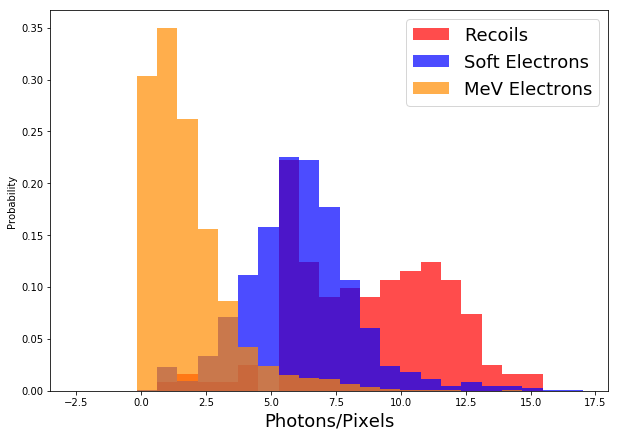

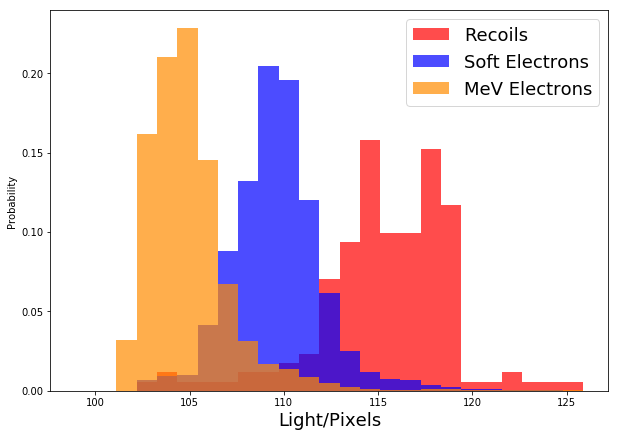

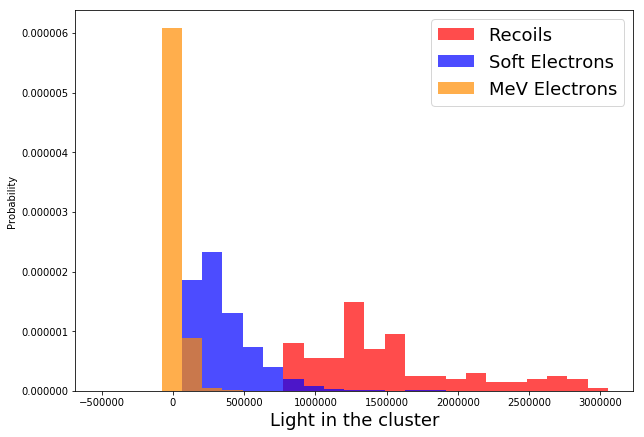

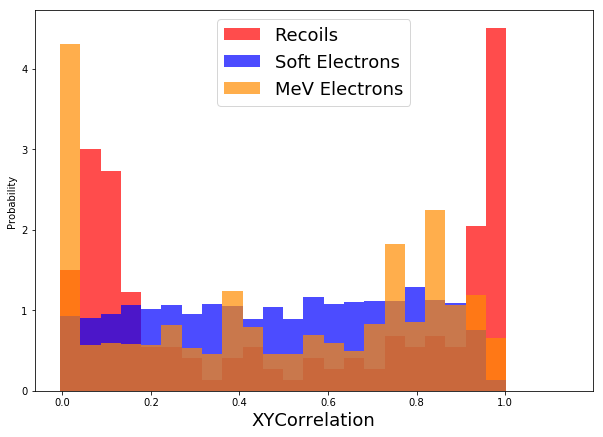

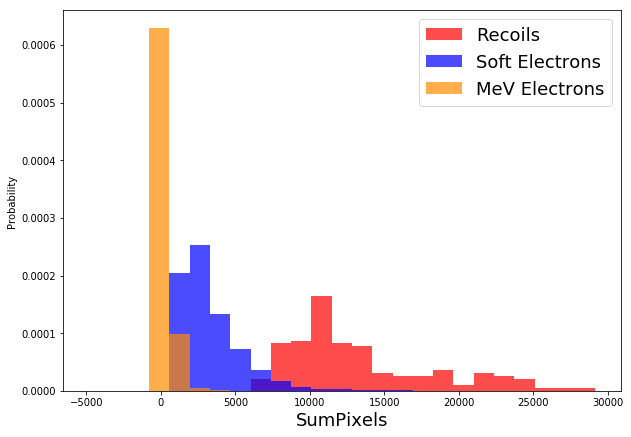

In [17]:
tl.plot2hist(PPP, bins = 25, nsd = 2, nse = 6, label='Photons/Pixels', logx = False, logy = False)
tl.plot2hist(LPP, bins = 25, nsd = 2, nse = 6, label='Light/Pixels', logx = False, logy = False)
tl.plot2hist(SLP, bins = 25, nsd = 1, nse = 5, label='Light in the cluster', logx = False, logy = False)
tl.plot2hist(COR, bins = 25, nsd = 2, nse = 2, label='XYCorrelation', logx = False, logy = False)
tl.plot2hist(SPP, bins = 25, nsd = 1, nse = 5, label='SumPixels', logx = False, logy = False)

## Ploting the specified type of cluster

In [ ]:
tag = 'm'
for cluN in df[df['Tag'] == tag].index:

    #cluN = 91 ## Specified Cluster

    Run = df[colhead[0]][cluN]
    Nim = df[colhead[1]][cluN]
    Xi  = df[colhead[3]][cluN]
    Yi  = df[colhead[4]][cluN]
    Lp  = df[colhead[5]][cluN]
    Lb  = df[colhead[6]][cluN]

    matrix = np.zeros([y_resolution,x_resolution],dtype=int)
    matrixb = np.zeros([y_resolution,x_resolution],dtype=int)
    
    matrix[Yi,Xi]=Lp
    matrixb[Yi,Xi]=Lb
    
    fig = plt.figure(figsize=(15,15))
    ax  = plt.gca()
    iax = ax.imshow(matrix,cmap="viridis", vmin=85,vmax=130)
    ax.set_ylim(np.min(Yi),np.max(Yi))
    ax.set_xlim(np.min(Xi),np.max(Xi))
    ax.set_title('Run %d - # of Image %d' % (Run, Nim))
    tl.colorbar(iax)
    plt.show(block=False)    
    
    key = input('Press <ret> to continue -> ')
    if key == 'stop':
        break
    plt.close

## Developing 

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned
/usr/lib64/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


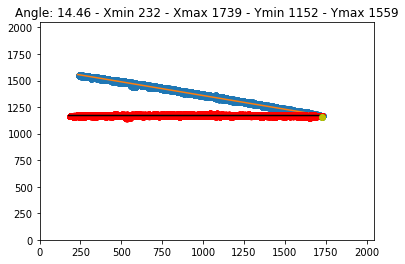

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


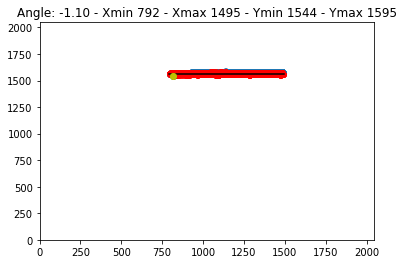

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


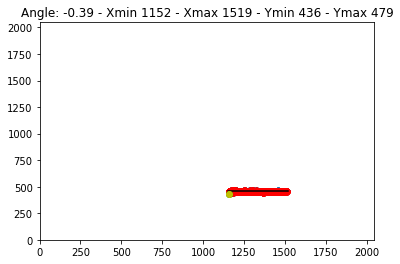

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


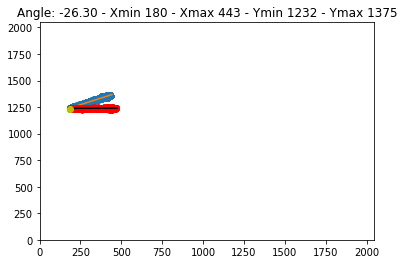

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


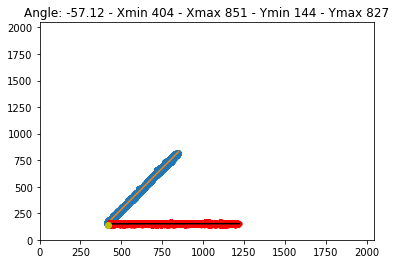

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


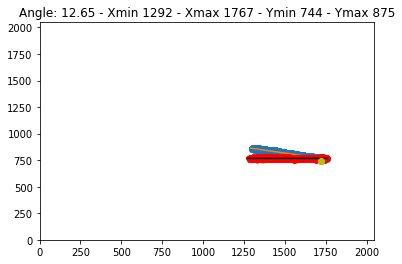

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


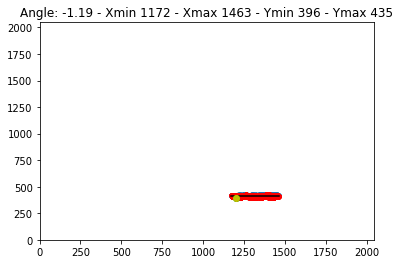

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


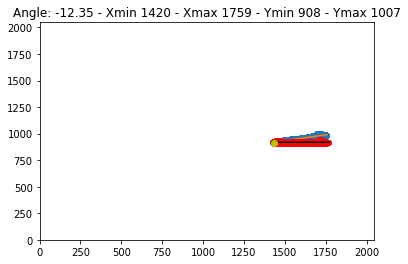

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


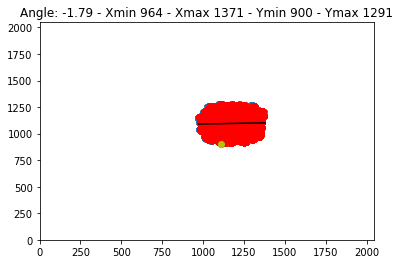

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


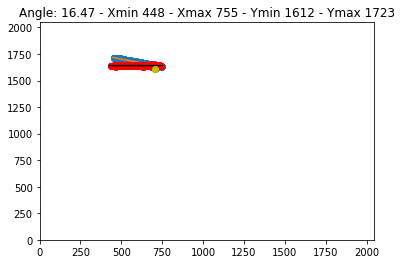

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


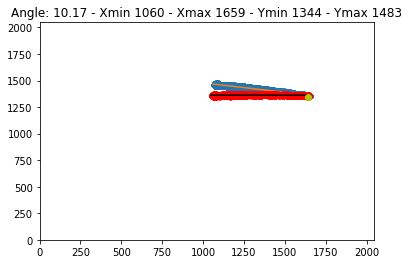

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


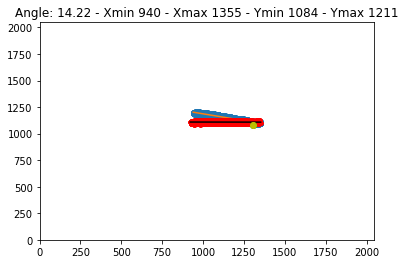

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


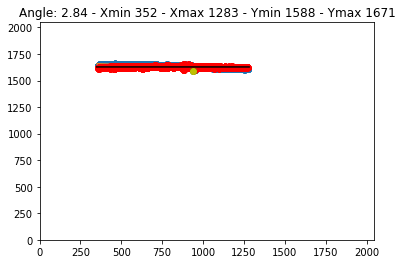

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


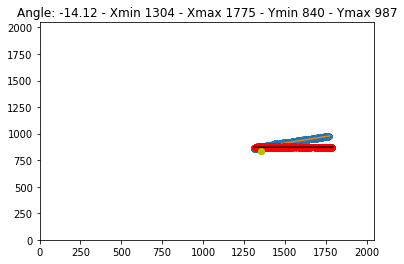

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


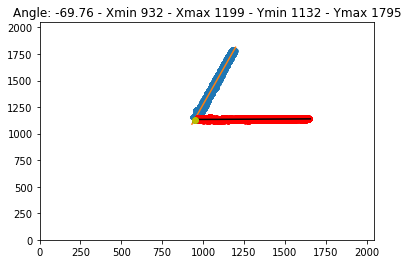

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


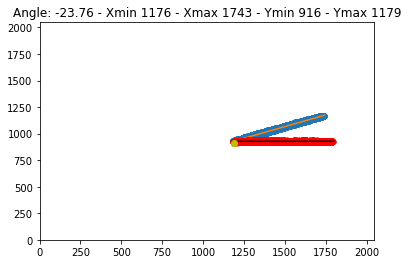

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


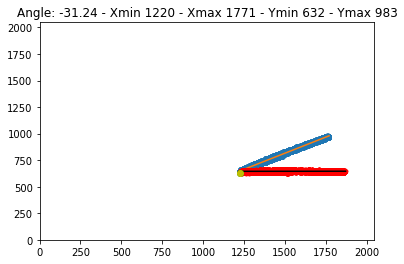

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


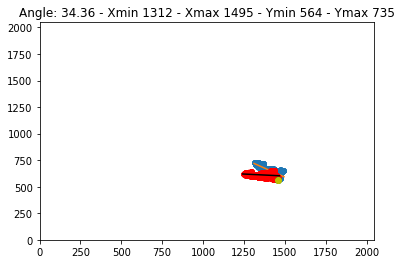

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


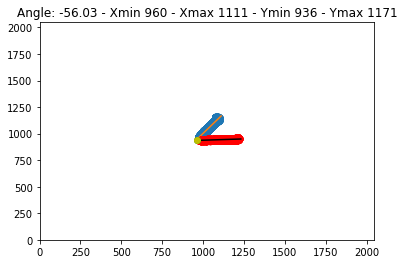

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


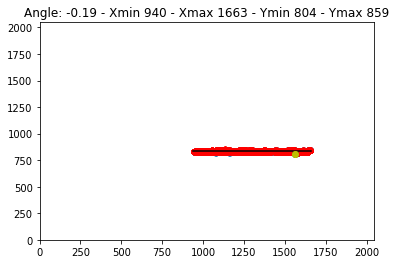

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


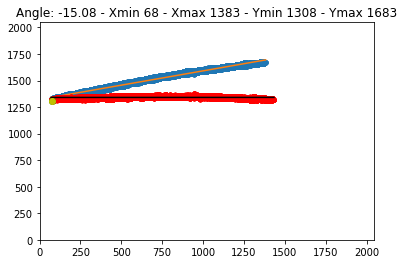

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


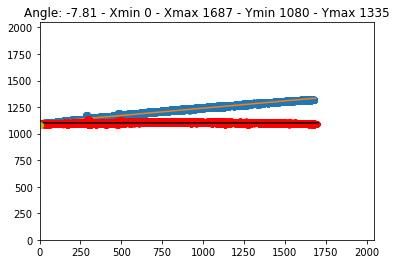

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


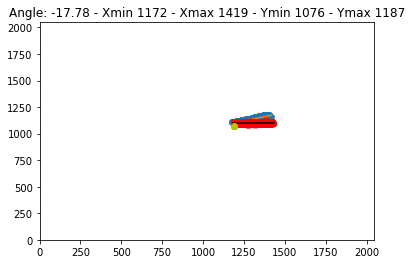

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


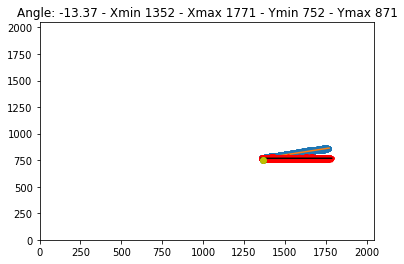

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


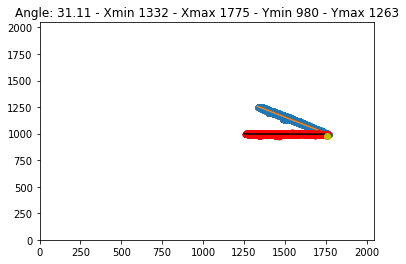

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


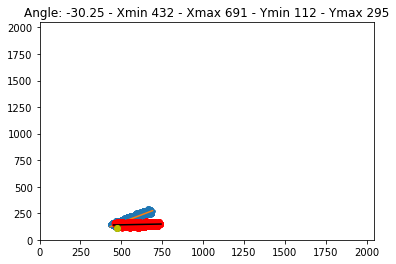

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


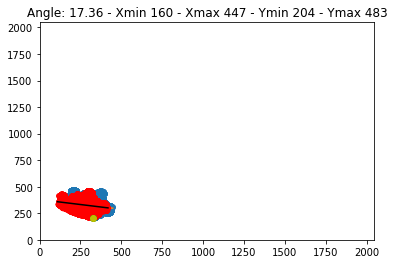

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


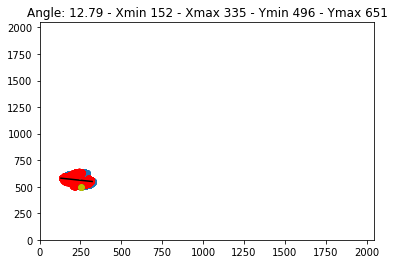

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


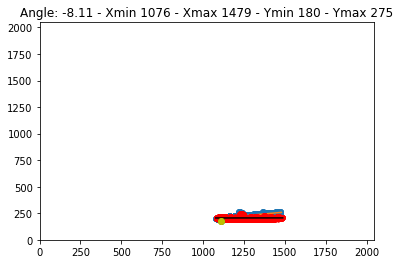

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


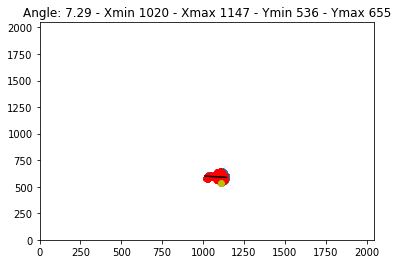

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


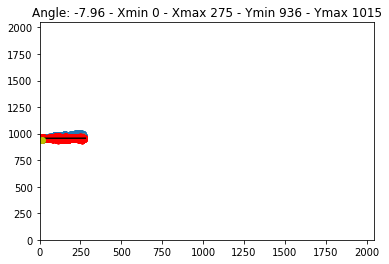

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


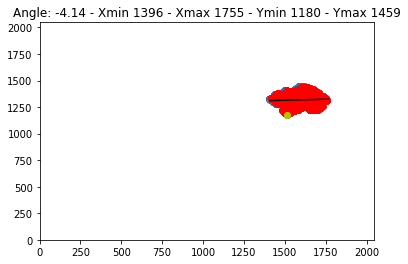

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


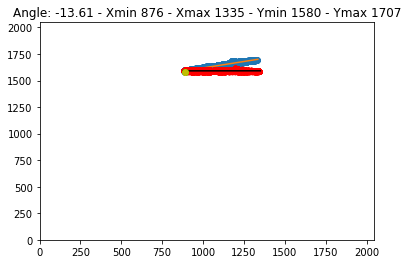

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


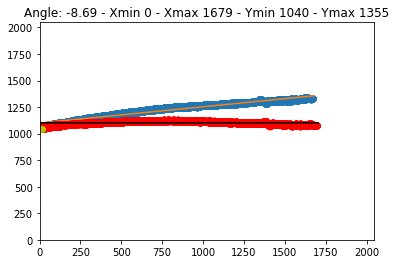

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


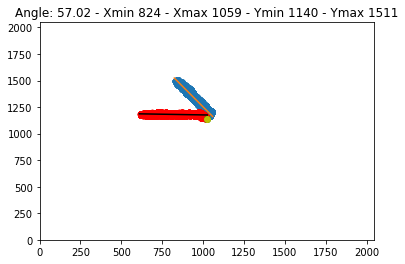

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


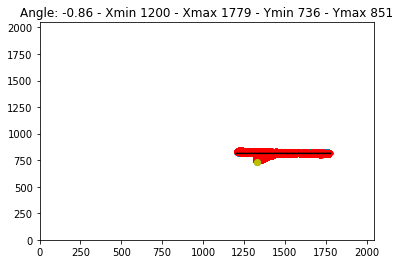

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


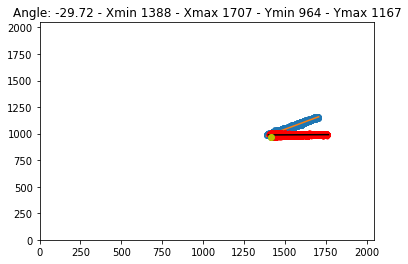

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


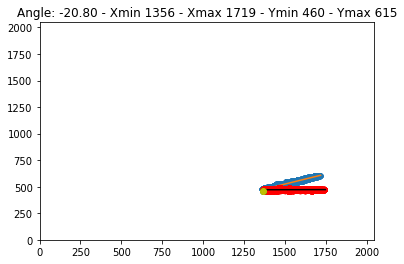

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


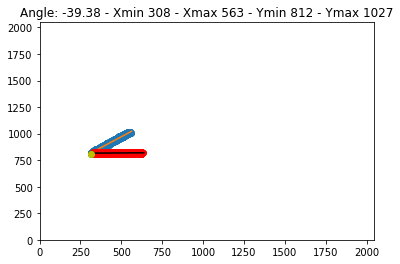

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


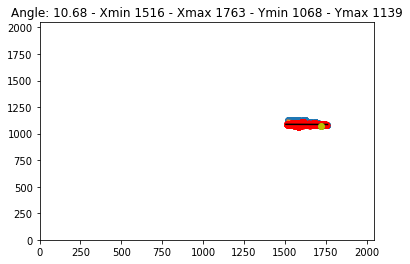

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


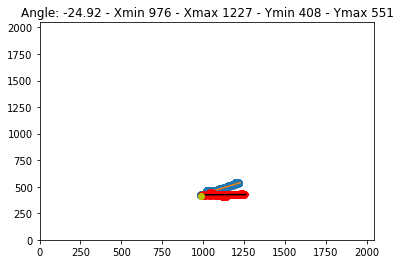

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


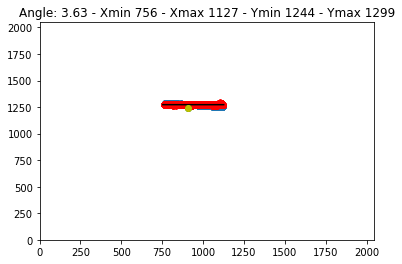

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


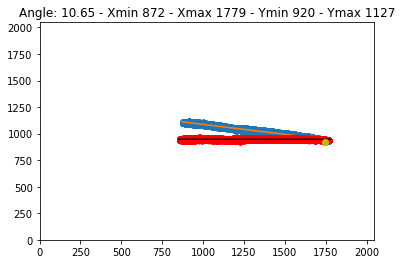

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


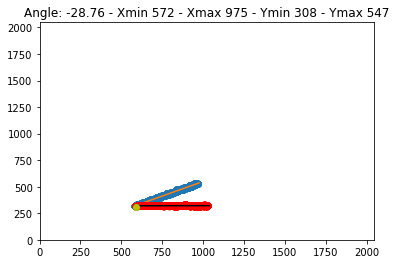

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


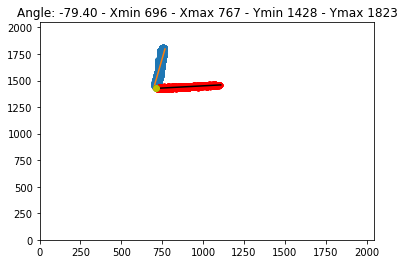

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


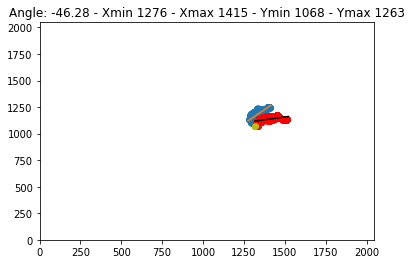

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


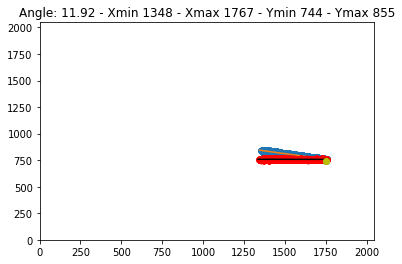

Press <ret> to continue -> 


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


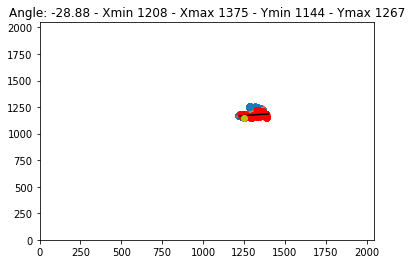

Press <ret> to continue -> stop


In [128]:
tag = 'l'
for cluN in df[df['Tag'] == tag].index:
    ind = cluN

    angle = getAngle(df.X[ind],df.Y[ind])
    
    newX,newY = rotate(df.X[ind][0],df.Y[ind][0],df.X[ind],df.Y[ind],angle)

    z = np.polyfit(df.X[ind],df.Y[ind], 1)
    func = np.poly1d(z)

    xp = np.linspace(np.min(df.X[ind]), np.max(df.X[ind]), 100)

    z1 = np.polyfit(newX,newY, 1)
    func1 = np.poly1d(z1)

    xp1 = np.linspace(np.min(newX), np.max(newX), 100)

    plt.plot(df.X[ind],df.Y[ind], '.', xp, func(xp), '-')
    #plt.hold()
    plt.plot(newX,newY, '.r', xp1, func1(xp1), '-k')
    plt.plot(df.X[ind][0],df.Y[ind][0], 'og')
    plt.plot(newX[0],newY[0], 'oy')
    #plt.xlim(0,2048)
    #plt.ylim(0,2048)
    plt.title("Angle: %.2f - Xmin %d - Xmax %d - Ymin %d - Ymax %d" % (math.degrees(angle),np.min(df.X[ind]),np.max(df.X[ind]),np.min(df.Y[ind]),np.max(df.Y[ind])))
    plt.show()

    key = input('Press <ret> to continue -> ')
    if key == 'stop':
        break

    plt.close()

In [127]:
def rotate(oX, oY, pX, pY, angle):
    from math import sin
    from math import cos
    from numpy import array
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox = oX
    oy = oY
    px = array(pX)
    py = array(pY)

    qx = ox + cos(angle) * (px - ox) - sin(angle) * (py - oy)
    qy = oy + sin(angle) * (px - ox) + cos(angle) * (py - oy)
    
    return qx.tolist(), qy.tolist()

def getAngle(X,Y):
    from numpy import polyfit
    from numpy import poly1d
    from numpy import arctan
    
    # - - - - Reta 0,0
    xo = [-2048,2048]
    yo = [0.001,0.001]
    
    zo = polyfit(yo,xo, 1)
    fo = poly1d(zo)    
    m1 = fo.c[0] 
    
    z = polyfit(X,Y, 1)
    func = poly1d(z) 
    m2 = func.c[0]
    
    
    
    angle = arctan(m1-m2/(1-m1*m2))
    
    return angle

def getC(X,Y):
    from numpy import polyfit
    from numpy import poly1d
    from numpy import arctan
    
    z = polyfit(X,Y, 1)
    func = poly1d(z)    
    
    return func.c[0]